In [ ]:
from google.colab import drive
import os


In [ ]:
# Mount Google Drive to access dataset
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Define dataset path in Google Drive
dataset_path = '/content/drive/MyDrive/carDataset'
project_dir = '/content/drive/MyDrive/YOLOv8_License_Plate'
os.makedirs(project_dir, exist_ok=True)
os.chdir(project_dir)

In [ ]:
# Install YOLOv8 and required libraries
!pip install ultralytics opencv-python pytesseract easyocr

from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 73.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# Load YOLOv8 model (pre-trained weights)
model = YOLO('yolov8n.pt')  # You can also use 'yolov8s.pt' for better accuracy

100%|██████████| 6.25M/6.25M [00:00<00:00, 102MB/s]


In [ ]:
# Define dataset YAML file path
data_yaml_path = os.path.join(dataset_path, 'data.yaml')

In [ ]:
import torch
print(torch.cuda.is_available())  # Should print True
print(torch.cuda.device_count())  # Should print at least 1

True
1


In [ ]:
# Train the model
model.train(
    data=data_yaml_path,  # Path to dataset config
    epochs=50,            # Number of training epochs
    imgsz=640,            # Image size
    batch=8,              # Batch size (adjust based on memory)
    device='cuda',        # Use GPU
    save=True             # Save model checkpoints
)


Ultralytics 8.3.72 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/carDataset/data.yaml, epochs=50, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=

100%|██████████| 755k/755k [00:00<00:00, 24.8MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 101MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/carDataset/train/labels... 267 images, 0 backgrounds, 0 corrupt: 100%|██████████| 267/267 [02:28<00:00,  1.80it/s]

train: New cache created: /content/drive/MyDrive/carDataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.3 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/carDataset/valid/labels... 74 images, 0 backgrounds, 0 corrupt: 100%|██████████| 74/74 [01:14<00:00,  1.00s/it]

val: New cache created: /content/drive/MyDrive/carDataset/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.21G      1.154      2.876      1.228          3        640: 100%|██████████| 34/34 [00:08<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.24it/s]

                   all         74         74          1      0.107      0.595      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       1.2G      1.156      1.903      1.191          5        640: 100%|██████████| 34/34 [00:09<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.26it/s]

                   all         74         74      0.718       0.73        0.8      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.16G      1.177      1.791      1.186          5        640: 100%|██████████| 34/34 [00:06<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.08it/s]

                   all         74         74      0.562      0.459      0.505      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.16G      1.119      1.666      1.172          6        640: 100%|██████████| 34/34 [00:09<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.67it/s]

                   all         74         74      0.464      0.782      0.534       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.16G      1.136      1.551      1.183          4        640: 100%|██████████| 34/34 [00:10<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.96it/s]

                   all         74         74      0.636       0.77      0.774      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       1.2G      1.089      1.414      1.149          4        640: 100%|██████████| 34/34 [00:06<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.72it/s]


                   all         74         74      0.952      0.919      0.961      0.711

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       1.2G      1.068      1.303      1.194          2        640: 100%|██████████| 34/34 [00:09<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.94it/s]

                   all         74         74      0.856      0.824      0.855      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       1.2G      1.057      1.307      1.158          6        640: 100%|██████████| 34/34 [00:06<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.84it/s]

                   all         74         74       0.97      0.905      0.963      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       1.2G      1.071      1.243      1.168          6        640: 100%|██████████| 34/34 [00:09<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.18it/s]


                   all         74         74      0.905      0.919       0.95      0.702

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       1.2G     0.9993      1.131      1.133          4        640: 100%|██████████| 34/34 [00:06<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.80it/s]


                   all         74         74      0.888      0.919      0.932      0.724

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       1.2G     0.9992      1.016      1.118          3        640: 100%|██████████| 34/34 [00:10<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.12it/s]

                   all         74         74      0.907      0.892      0.954      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       1.2G      1.001      1.031      1.113          3        640: 100%|██████████| 34/34 [00:05<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.90it/s]


                   all         74         74      0.941      0.946      0.948      0.762

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       1.2G      1.056      1.021      1.167          4        640: 100%|██████████| 34/34 [00:10<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.93it/s]

                   all         74         74      0.935      0.919      0.959      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       1.2G     0.9992     0.9361      1.095          6        640: 100%|██████████| 34/34 [00:06<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.45it/s]

                   all         74         74      0.911      0.973       0.96      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50       1.2G     0.9619     0.9242      1.087          3        640: 100%|██████████| 34/34 [00:09<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.72it/s]


                   all         74         74      0.968      0.973      0.983      0.779

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       1.2G     0.9401     0.8873      1.105          5        640: 100%|██████████| 34/34 [00:06<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.46it/s]

                   all         74         74       0.98      0.946      0.983      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       1.2G     0.9248     0.8324      1.051          3        640: 100%|██████████| 34/34 [00:09<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.79it/s]

                   all         74         74      0.948       0.98      0.982      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50       1.2G     0.9138      0.834      1.049          4        640: 100%|██████████| 34/34 [00:06<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.22it/s]

                   all         74         74      0.973      0.973       0.98      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       1.2G     0.8545     0.7839      1.031          5        640: 100%|██████████| 34/34 [00:09<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.12it/s]

                   all         74         74       0.97      0.986      0.981      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       1.2G     0.8453     0.7579      1.048          6        640: 100%|██████████| 34/34 [00:06<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.41it/s]

                   all         74         74      0.971      0.973      0.977      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50       1.2G     0.9028     0.7633       1.06         10        640: 100%|██████████| 34/34 [00:08<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.94it/s]

                   all         74         74      0.973      0.985      0.984      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       1.2G     0.9049     0.7606      1.061          6        640: 100%|██████████| 34/34 [00:06<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.78it/s]

                   all         74         74      0.971      0.973      0.983      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       1.2G     0.8498     0.7079      1.031          4        640: 100%|██████████| 34/34 [00:08<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.04it/s]

                   all         74         74      0.986      0.941      0.974      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       1.2G     0.8125     0.6897      1.029          3        640: 100%|██████████| 34/34 [00:07<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.16it/s]

                   all         74         74      0.974      0.986      0.985       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50       1.2G     0.8185     0.6864       1.03          4        640: 100%|██████████| 34/34 [00:08<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.11it/s]

                   all         74         74      0.983      0.986      0.985      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       1.2G      0.775     0.6329      1.013          5        640: 100%|██████████| 34/34 [00:07<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.00it/s]

                   all         74         74       0.98      0.973      0.983      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50       1.2G     0.7918     0.6416      1.027          6        640: 100%|██████████| 34/34 [00:07<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.49it/s]

                   all         74         74      0.976      0.973      0.982      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50       1.2G     0.8124     0.6576      1.039          3        640: 100%|██████████| 34/34 [00:07<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.78it/s]

                   all         74         74      0.971      0.986      0.984      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       1.2G     0.7735      0.631      1.015          7        640: 100%|██████████| 34/34 [00:07<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.75it/s]

                   all         74         74      0.985      0.973      0.977      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       1.2G     0.7629     0.6136     0.9896          5        640: 100%|██████████| 34/34 [00:07<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.82it/s]

                   all         74         74      0.996      0.973      0.982      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50       1.2G     0.7866     0.6511      1.016          7        640: 100%|██████████| 34/34 [00:06<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.80it/s]

                   all         74         74      0.973      0.984      0.984      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       1.2G      0.731     0.5831     0.9955          5        640: 100%|██████████| 34/34 [00:08<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.73it/s]

                   all         74         74      0.993      0.986      0.985      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       1.2G     0.7693     0.6037      1.015          7        640: 100%|██████████| 34/34 [00:06<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.62it/s]

                   all         74         74      0.982      0.986      0.985      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.19G     0.7061       0.57     0.9963          4        640: 100%|██████████| 34/34 [00:08<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.99it/s]

                   all         74         74      0.999      0.986      0.985      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       1.2G     0.7392     0.5593     0.9842          6        640: 100%|██████████| 34/34 [00:06<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.84it/s]

                   all         74         74      0.997      0.959      0.985      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       1.2G      0.711      0.559     0.9785          1        640: 100%|██████████| 34/34 [00:08<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.79it/s]

                   all         74         74      0.971      0.986      0.985      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       1.2G     0.6802     0.5513      0.964          7        640: 100%|██████████| 34/34 [00:06<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.60it/s]

                   all         74         74      0.988      0.973      0.985      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.19G     0.7033     0.5597     0.9775          4        640: 100%|██████████| 34/34 [00:09<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.41it/s]

                   all         74         74      0.983      0.986      0.985       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       1.2G     0.7047     0.5536     0.9603          5        640: 100%|██████████| 34/34 [00:06<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.64it/s]

                   all         74         74      0.983      0.986      0.985      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       1.2G     0.6907     0.5319     0.9683          4        640: 100%|██████████| 34/34 [00:09<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.13it/s]

                   all         74         74      0.985      0.986      0.985      0.835


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50       1.2G     0.6202     0.4834     0.9284          3        640: 100%|██████████| 34/34 [00:06<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.83it/s]

                   all         74         74      0.981      0.986      0.985      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.19G     0.6101     0.4831     0.9126          3        640: 100%|██████████| 34/34 [00:09<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.37it/s]

                   all         74         74      0.984      0.986      0.985      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50       1.2G      0.593     0.4521      0.885          3        640: 100%|██████████| 34/34 [00:06<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.51it/s]

                   all         74         74      0.986      0.982      0.985      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       1.2G     0.5813     0.4548      0.905          3        640: 100%|██████████| 34/34 [00:09<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.36it/s]

                   all         74         74      0.985      0.973      0.985      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50       1.2G     0.5934     0.4487     0.8966          3        640: 100%|██████████| 34/34 [00:06<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.18it/s]

                   all         74         74      0.986      0.986      0.985      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      1.19G     0.5901      0.463     0.9284          3        640: 100%|██████████| 34/34 [00:09<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.83it/s]

                   all         74         74      0.986      0.986      0.985      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       1.2G     0.5806     0.4418     0.9065          3        640: 100%|██████████| 34/34 [00:06<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  5.58it/s]

                   all         74         74      0.986      0.986      0.985      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50       1.2G     0.5677     0.4378     0.8852          3        640: 100%|██████████| 34/34 [00:09<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.08it/s]

                   all         74         74      0.985      0.986      0.985       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50       1.2G     0.5495     0.4222     0.8909          3        640: 100%|██████████| 34/34 [00:06<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.09it/s]

                   all         74         74      0.985      0.986      0.985      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      1.19G     0.5683     0.4174     0.8938          3        640: 100%|██████████| 34/34 [00:09<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:00<00:00,  6.10it/s]

                   all         74         74      0.986      0.986      0.985      0.845



50 epochs completed in 0.140 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.72 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.02it/s]


                   all         74         74      0.985      0.973      0.985      0.854
Speed: 0.2ms preprocess, 6.5ms inference, 0.0ms loss, 5.2ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x77faf8fa2c90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
# Save the trained model
best_model_path = '/content/drive/MyDrive/YOLOv8_License_Plate/runs/detect/train/weights/best.pt'
if os.path.exists(best_model_path):
    print("Training completed successfully! Downloading the model...")
    from google.colab import files
    files.download(best_model_path)
else:
    print("Error: Model training failed or best.pt not found.")

Training completed successfully! Downloading the model...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# Load training results
results_path = '/content/drive/MyDrive/YOLOv8_License_Plate/runs/detect/train/results.csv'  # Ensure this path matches your training run
df = pd.read_csv(results_path)

# Display the last few epochs' results
print(df.tail())


    epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
45     46  465.059         0.59007         0.46296         0.92843   
46     47  472.758         0.58059         0.44176         0.90651   
47     48  484.002         0.56766         0.43779         0.88519   
48     49  491.660         0.54953         0.42218         0.89095   
49     50  503.209         0.56829         0.41739         0.89376   

    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
45               0.98560            0.98649           0.98511   
46               0.98648            0.98585           0.98539   
47               0.98511            0.98649           0.98536   
48               0.98492            0.98649           0.98514   
49               0.98648            0.98635           0.98515   

    metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
45              0.84688       0.61382       0.41101       0.90661  0.000218   
46              0.84708       

In [ ]:
# Load the trained model
model = YOLO('/content/drive/MyDrive/YOLOv8_License_Plate/runs/detect/train/weights/best.pt')  # Update path if needed

# Run validation
metrics = model.val()

# Print summary metrics
print(metrics)


Ultralytics 8.3.72 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/carDataset/valid/labels.cache... 74 images, 0 backgrounds, 0 corrupt: 100%|██████████| 74/74 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]


                   all         74         74      0.985      0.973      0.985      0.851
Speed: 0.5ms preprocess, 10.6ms inference, 0.0ms loss, 5.2ms postprocess per image
Results saved to runs/detect/val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x77fbdb522150>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.03303

In [ ]:
results = model('/content/car1.jpg', save=True, conf=0.5)



image 1/1 /content/car1.jpg: 448x640 1 LicensePlate, 79.0ms
Speed: 6.7ms preprocess, 79.0ms inference, 3.1ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict


In [ ]:
results = model('/content/car2.jpg', save=True, conf=0.5)



image 1/1 /content/car2.jpg: 640x640 1 LicensePlate, 10.9ms
Speed: 5.1ms preprocess, 10.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


In [ ]:
results = model('/content/car3.jpg', save=True, conf=0.5)


image 1/1 /content/car3.jpg: 384x640 1 LicensePlate, 43.7ms
Speed: 5.4ms preprocess, 43.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


In [ ]:
results = model('/content/7.jpg', save=True, conf=0.5)


image 1/1 /content/7.jpg: 480x640 1 LicensePlate, 79.5ms
Speed: 7.1ms preprocess, 79.5ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict2


In [ ]:
results = model('/content/car9.jpg', save=True, conf=0.5)


image 1/1 /content/car9.jpg: 512x640 1 LicensePlate, 21.3ms
Speed: 6.2ms preprocess, 21.3ms inference, 2.5ms postprocess per image at shape (1, 3, 512, 640)
Results saved to runs/detect/predict3


In [ ]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 69.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 114.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.6/914.6 kB 38.5 MB/s eta 0:00:00



image 1/1 /content/drive/MyDrive/YOLOv8_License_Plate/runs/detect/predict/car1.jpg: 448x640 1 LicensePlate, 38.1ms
Speed: 3.7ms preprocess, 38.1ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)
Detected License Plate: MH 20 EE 7602


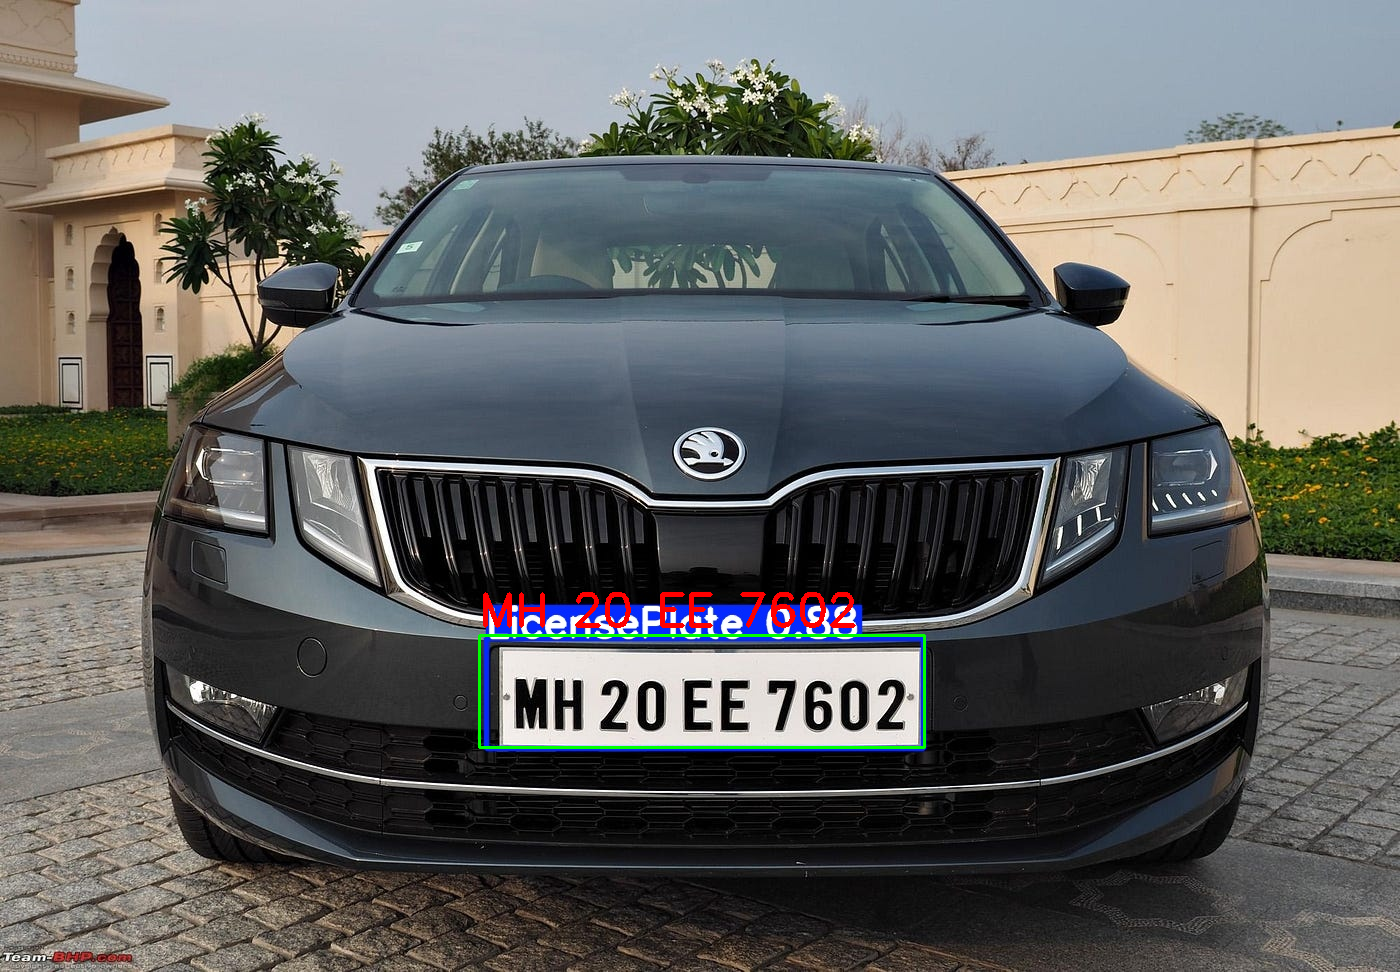

Final Recognized Text: MH 20 EE 7602


In [ ]:
import cv2
import torch
import easyocr
import numpy as np
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

# Load the trained YOLOv8 model for license plate detection
model = YOLO('/content/drive/MyDrive/YOLOv8_License_Plate/runs/detect/train/weights/best.pt')

# Load OCR Model (EasyOCR)
reader = easyocr.Reader(['en'])  # English Language

# Function to detect license plates and perform OCR
def detect_and_ocr(image_path):
    # Load image
    img = cv2.imread(image_path)

    # Run YOLOv8 for license plate detection
    results = model(image_path)

    # Process detections
    for r in results:
        for box in r.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get bounding box
            plate_img = img[y1:y2, x1:x2]  # Crop license plate

            # Preprocess image for OCR
            gray = cv2.cvtColor(plate_img, cv2.COLOR_BGR2GRAY)
            _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

            # Perform OCR
            ocr_result = reader.readtext(thresh)

            # Extract text from OCR result
            plate_text = ""
            for detection in ocr_result:
                plate_text += detection[1] + " "

            # Draw bounding box and recognized text
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, plate_text.strip(), (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 255), 4)

            print(f"Detected License Plate: {plate_text.strip()}")

    # Show final image with detected plates and OCR results
    cv2_imshow(img)
    return plate_text.strip()

# Test with a sample image
image_path = '/content/drive/MyDrive/YOLOv8_License_Plate/runs/detect/predict/car1.jpg'  # Replace with actual test image path
detected_text = detect_and_ocr(image_path)

print(f"Final Recognized Text: {detected_text}")



image 1/1 /content/runs/detect/predict2/7.jpg: 480x640 1 LicensePlate, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
Detected License Plate: KL54 4.2670


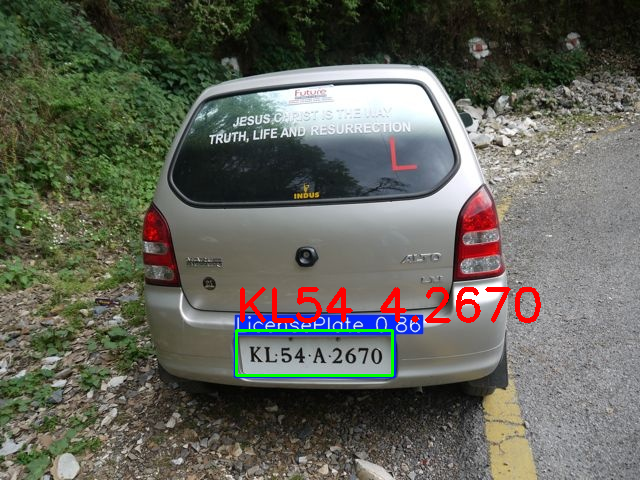

Final Recognized Text: KL54 4.2670


In [ ]:
import cv2
import torch
import easyocr
import numpy as np
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

# Load the trained YOLOv8 model for license plate detection
model = YOLO('/content/drive/MyDrive/YOLOv8_License_Plate/runs/detect/train/weights/best.pt')

# Load OCR Model (EasyOCR)
reader = easyocr.Reader(['en'])  # English Language

# Function to detect license plates and perform OCR
def detect_and_ocr(image_path):
    # Load image
    img = cv2.imread(image_path)

    # Run YOLOv8 for license plate detection
    results = model(image_path)

    # Process detections
    for r in results:
        for box in r.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get bounding box
            plate_img = img[y1:y2, x1:x2]  # Crop license plate

            # Preprocess image for OCR
            gray = cv2.cvtColor(plate_img, cv2.COLOR_BGR2GRAY)
            _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

            # Perform OCR
            ocr_result = reader.readtext(thresh)

            # Extract text from OCR result
            plate_text = ""
            for detection in ocr_result:
                plate_text += detection[1] + " "

            # Draw bounding box and recognized text
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, plate_text.strip(), (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 255), 4)

            print(f"Detected License Plate: {plate_text.strip()}")

    # Show final image with detected plates and OCR results
    cv2_imshow(img)
    return plate_text.strip()

# Test with a sample image
image_path = '/content/runs/detect/predict2/7.jpg'  # Replace with actual test image path
detected_text = detect_and_ocr(image_path)

print(f"Final Recognized Text: {detected_text}")


new code


In [ ]:
!pip install easyocr
!pip install imutils

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

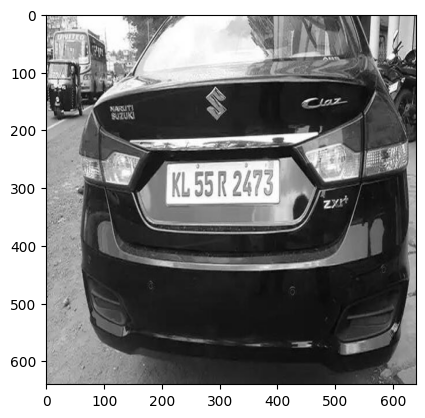

In [ ]:
img = cv2.imread('/content/drive/MyDrive/carDataset/test/images/8edca6de-d964-4027-823d-f70d3f872412___12042943_1003224833031653_9073848483429898813_n-jpg_jpeg.rf.1882821d2dd595aee5b484591273cab7.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

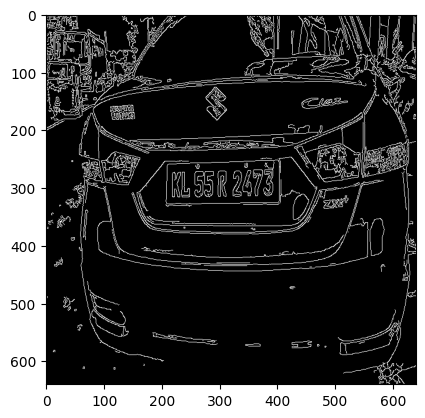

In [ ]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [ ]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
location

array([[[403, 256]],

       [[401, 326]],

       [[207, 324]],

       [[212, 259]]], dtype=int32)

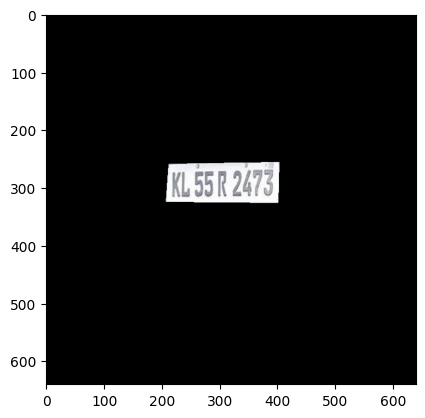

In [ ]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

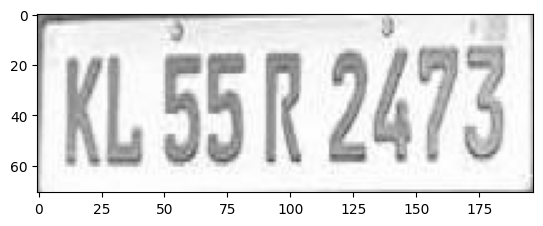

In [ ]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[1, 5], [197, 5], [197, 69], [1, 69]], 'KL 55R 2473|', 0.3481737764474245)]

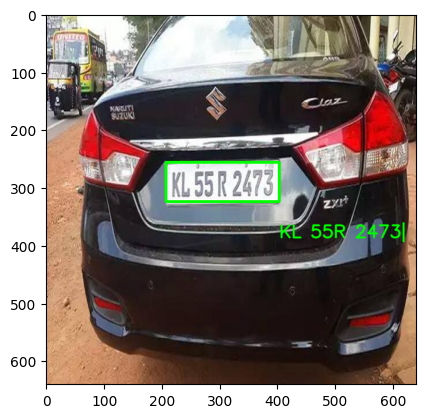

In [ ]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))